# Exploratory Notebook
**Objectif:** create a film recommendation engine. This Notebook is  a first dive into data in order to prepare them for modeles.  
**Inputs data** from [imdb](https://www.imdb.com/) can be found [here](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Moteur+de+recommandation+de+films/imdb-5000-movie-dataset.zip).


In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

### Cleaning

In [2]:
# import data
data = pd.read_csv("imdb-5000-movie-dataset/movie_metadata.csv")
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


C:\Users\Mo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Series.data is deprecated and will be removed in a future version
  """


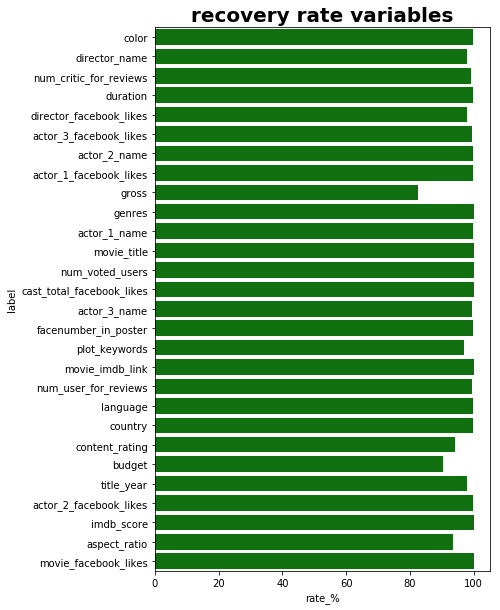

In [4]:
# recovery rate per feature
# inputs
buff = 100 - data.isnull().sum()/len(data) * 100
recovery = pd.DataFrame({"label": buff.index,
                         "rate_%" : buff.data})

# plot
plt.figure(figsize=(6,10))
plt.title("recovery rate variables", fontweight="bold", size = 20)
sns.barplot(x= "rate_%", y= "label", data=recovery, label="Total", color="g");

Good recovery rate overall

In [5]:
# look for duplicate in the pair "movie_title" & "director_name" and remove them:
mask2 = data.duplicated(subset = ["movie_title","director_name"])

b = len(data)
data = data.drop_duplicates(subset = ["movie_title","director_name"], keep = "last")
a = len(data)
print("{} duplicates found, {} lines will be removed ({}%)".format(sum(mask2), 
                                                             b-a,
                                                            round((b-a)/b,2)))

124 duplicates found, 124 lines will be removed (0.02%)


In [6]:
# cleaning movie title
data["movie_title"] = data["movie_title"].str.replace("\xa0","")  # Unicode artefact: "\xa0" (non-breaking space)

In [7]:
# remove empty line in "movie_title" or "imdb_score" or "director_name":
features = ["movie_title","imdb_score","director_name"]

b = len(data)
for feature in features:
    data = data.dropna(subset = [feature])
a = len(data)
print("{} lines removed for NaN in {}  ({}%))".format(b-a, features, round((b-a)/b,2)))

102 lines removed for NaN in ['movie_title', 'imdb_score', 'director_name']  (0.02%))


### Exploration

In [8]:
# exploration of numerique data (not "object" type)
xn = data.select_dtypes(exclude=['object'])
xn.shape[1]
xn.columns.values

array(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'facenumber_in_poster', 'num_user_for_reviews', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

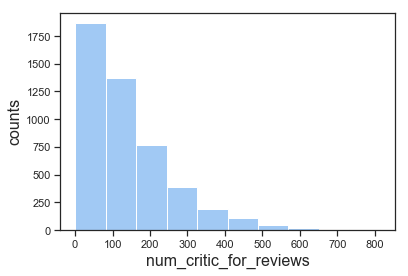

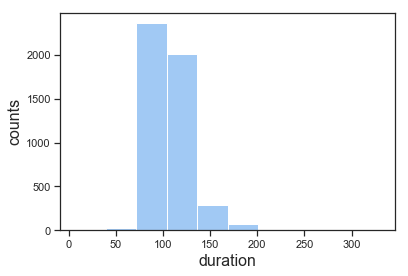

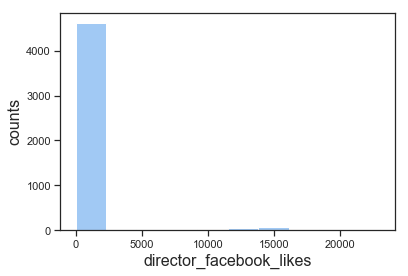

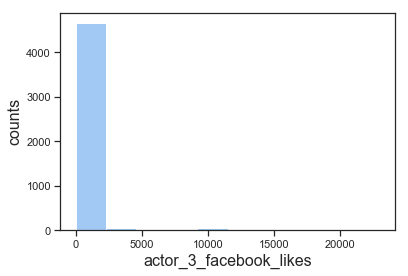

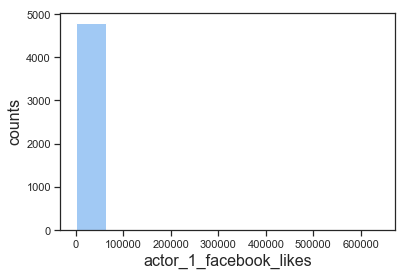

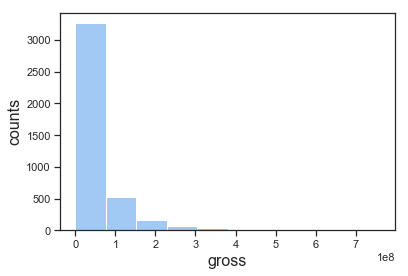

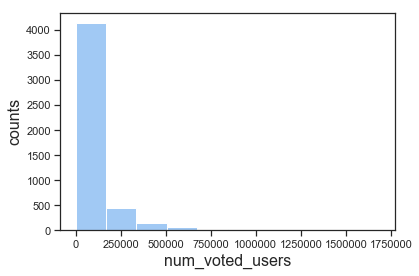

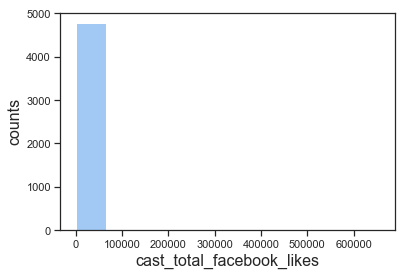

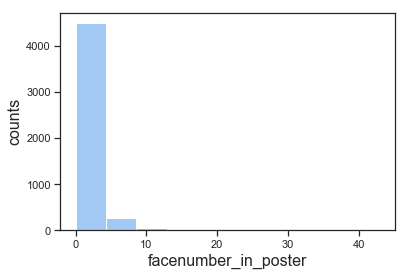

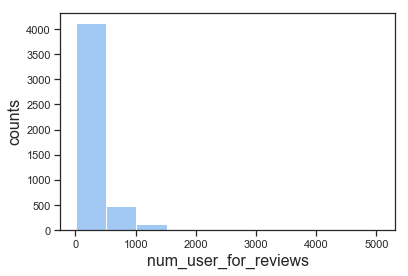

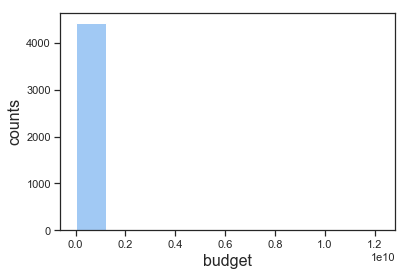

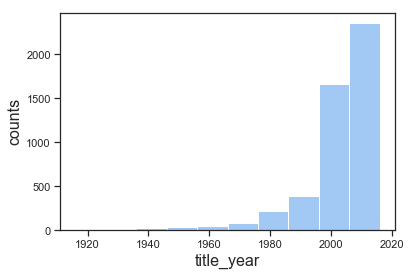

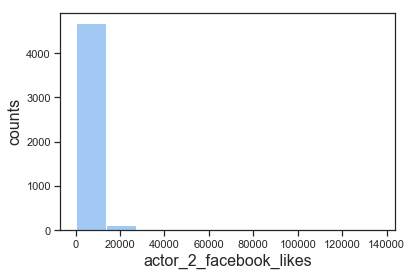

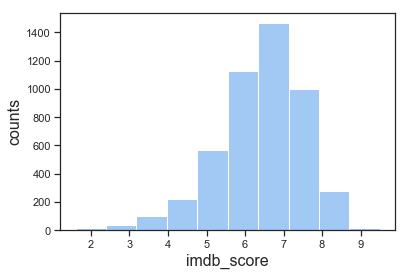

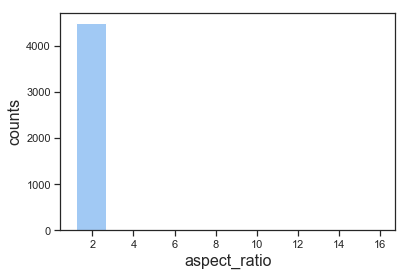

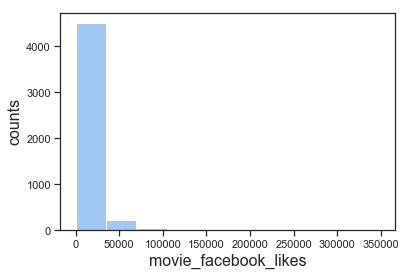

In [9]:
# plot x distribution
import matplotlib.pyplot as plt
import seaborn as sns

# inputs
xn = data.select_dtypes(exclude=['object'])

# plot
sns.set(style="ticks", palette="pastel")
for i,x in enumerate(xn):
    plt.figure(figsize=(6,4))
    plt.hist(xn[x].dropna())
    plt.ylabel('counts', size = 16)
    plt.xlabel(xn.columns.values[i], size = 16)
    plt.show()

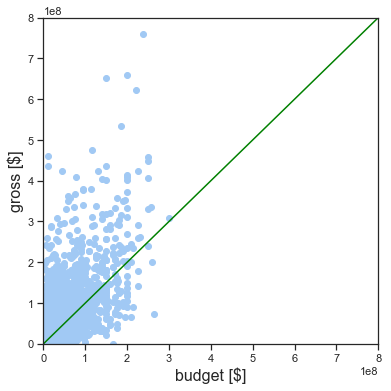

In [10]:
# plot  Budget versus Gross

mask = data["country"] == "USA"   # to disregard currency issue ($)

plt.figure(figsize=(6,6))
u = np.linspace(0,800000000,10)
plt.scatter(data.loc[mask,'budget'], data.loc[mask,'gross'] )
plt.plot(u,u,c = "green",label="unity line")
plt.ylabel('gross [$]', size = 16)
plt.xlabel('budget [$]', size = 16)
plt.xlim(0,800000000)
plt.ylim(0,800000000)
plt.show()

In [11]:
mask = ((data["gross"] < 100000000) & (data["budget"] > 240000000) & (data["country"] == "USA"))
data.loc[mask,"movie_title"]

5    John Carter
Name: movie_title, dtype: object

Financial succes: Avatar  
Financial Flop: John Carter

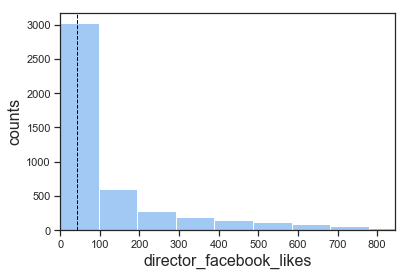

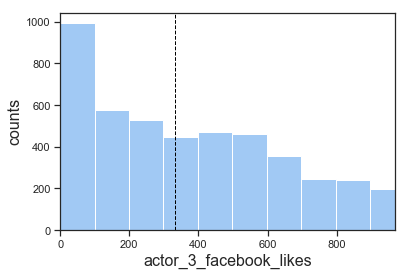

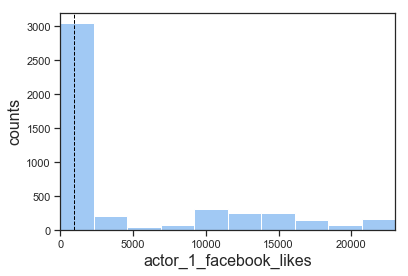

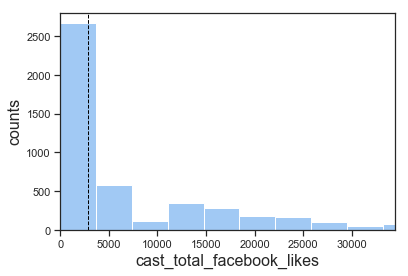

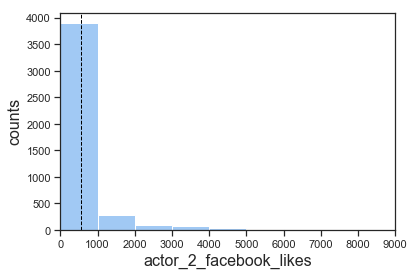

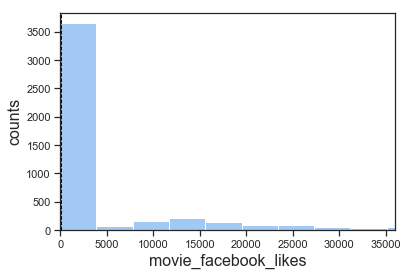

In [12]:
# Zoom on face book related distribution (very skew and spraid)
# we will limite the vizualisation to the p95

#input
col_sel = data.columns.str.contains("facebook")
names = data.columns[col_sel]
xn = data.loc[:,names]

#plot
sns.set(style="ticks", palette="pastel")
for i,x in enumerate(xn):
    mask = xn[x] < xn[x].quantile(0.95)
    xn[x]  = xn.loc[mask,x]
    plt.figure(figsize=(6,4))
    plt.hist(xn[x].dropna())
    plt.xlim(0, xn[x].quantile(0.99))
    plt.axvline(xn[x].median(), color='black', linestyle='--', linewidth=1, label = "median")
    plt.axvline(xn[x].quantile(0.99), color='black', linestyle=':', linewidth=1, label = "P90")
    plt.ylabel('counts', size = 16)
    plt.xlabel(xn.columns.values[i], size = 16)
    plt.show()


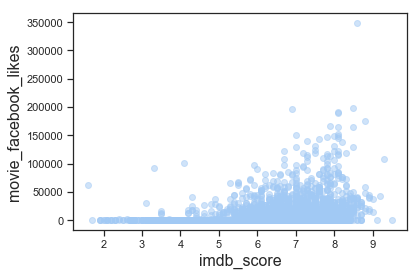

In [13]:
# relation beetween Facebook like and IMDB score on movies
plt.scatter(x = "imdb_score", y = "movie_facebook_likes", data = data, alpha = 0.5)
plt.xlabel('imdb_score', size = 16)
plt.ylabel('movie_facebook_likes', size = 16)
plt.show()

In [14]:
# which movie is this top value/outlier ?
data.sort_values("movie_facebook_likes", ascending= False)[["movie_facebook_likes","movie_title","imdb_score"]].head(5)

,movie_facebook_likes,movie_title,imdb_score
96,349000,Interstellar,8.6
296,199000,Django Unchained,8.5
10,197000,Batman v Superman: Dawn of Justice,6.9
128,191000,Mad Max: Fury Road,8.1
179,190000,The Revenant,8.1


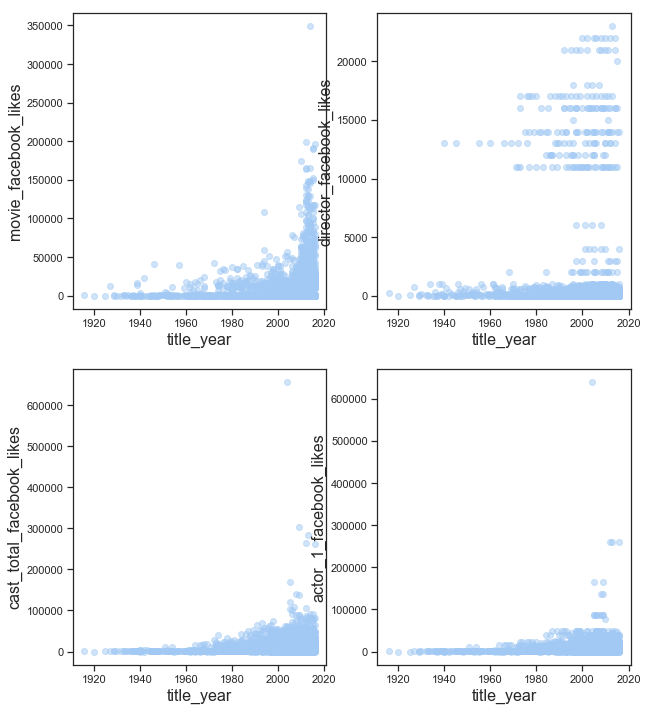

In [15]:
#Facebook like in during the years
# inputs
x1 = data[["title_year","movie_facebook_likes"]].dropna()
x2 = data[["title_year","director_facebook_likes"]].dropna()
x3 = data[["title_year","cast_total_facebook_likes"]].dropna()
x4 = data[["title_year","actor_1_facebook_likes"]].dropna()
xn = (x1,x2,x3,x4)

# plot
plt.figure(figsize=(10,12))
for i,x in enumerate(xn):
    plt.subplot(2,2,i+1)
    plt.scatter(x = x.columns.values[0], y = x.columns.values[1], 
            data = x,
            alpha = 0.5,
            label = "")
    plt.ylabel(x.columns.values[1], size = 16)
    plt.xlabel(x.columns.values[0], size = 16)
plt.show()

Directors (and actors) can have done many movies (--> explain horizontal line). 

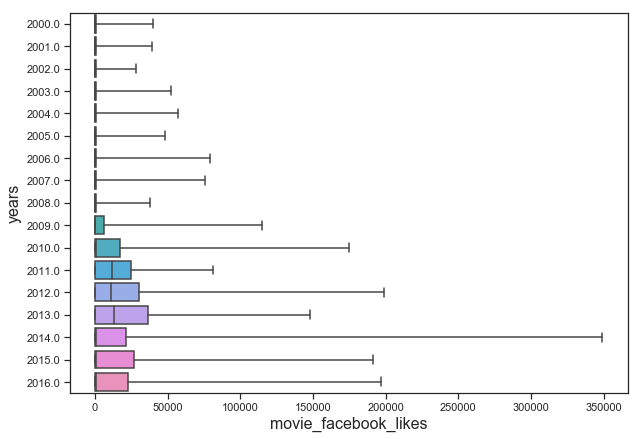

In [16]:
# distribution of likes during the years
mask = (data["title_year"] > 1999)
x = data[mask]

plt.figure(figsize=(10,7))
sns.boxplot(x="movie_facebook_likes", y=x["title_year"].astype('category'), data=x, whis="range")
plt.ylabel("years", size = 16)
plt.xlabel("movie_facebook_likes", size = 16)
plt.show()

Because of very squeese distributions in time and count, "facebookLike" features do not seems relevant enought to be used in our recommendation model.  

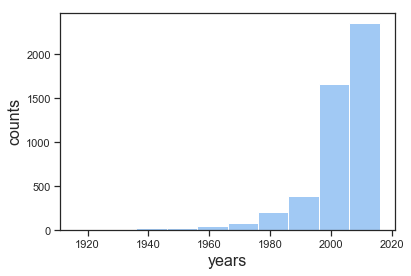

In [17]:
# movies per year
plt.hist(x1["title_year"])
plt.xlabel("years", size = 16)
plt.ylabel("counts", size = 16)
plt.show()

Most movies in the database are less than 20 years old.

Let's explore "genres","plot_keywords" and see if they can be usefull.

In [18]:
data[["genres","plot_keywords"]].head(5)

,genres,plot_keywords
0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic
1,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...
2,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist
3,Action|Thriller,deception|imprisonment|lawlessness|police offi...
4,Documentary,NaN


In [19]:
# genres: distribution
genres = {}
for genre in data["genres"]:
    liste = genre.split(sep = "|")
    for element in liste:
        if element in genres:
            genres[element] += 1
        else:
            genres[element] = 1
print(genres)

{'Action': 1095, 'Adventure': 878, 'Fantasy': 569, 'Sci-Fi': 578, 'Thriller': 1337, 'Documentary': 120, 'Animation': 233, 'Comedy': 1813, 'Family': 523, 'Musical': 131, 'Romance': 1067, 'Mystery': 461, 'Western': 94, 'Drama': 2461, 'History': 199, 'Sport': 176, 'Crime': 838, 'Horror': 533, 'War': 206, 'Biography': 289, 'Music': 211, 'News': 3, 'Short': 5, 'Film-Noir': 6}


In [20]:
len(genres)

24

In [21]:
# keywords: distribution
keywords = {}
x = data["plot_keywords"].dropna()
for keyword in x:
    liste = keyword.split(sep = "|")
    for element in liste:
        if element in keywords:
            keywords[element] += 1
        else:
            keywords[element] = 1
print(keywords)

{'avatar': 3, 'future': 41, 'marine': 6, 'native': 1, 'paraplegic': 1, 'goddess': 2, 'marriage ceremony': 1, 'marriage proposal': 5, 'pirate': 16, 'singapore': 2, 'bomb': 18, 'espionage': 7, 'sequel': 36, 'spy': 37, 'terrorist': 40, 'deception': 5, 'imprisonment': 3, 'lawlessness': 1, 'police officer': 15, 'terrorist plot': 2, 'alien': 77, 'american civil war': 3, 'male nipple': 1, 'mars': 4, 'princess': 31, '17th century': 5, 'based on fairy tale': 3, 'disney': 7, 'flower': 3, 'tower': 3, 'artificial intelligence': 8, 'based on comic book': 12, 'captain america': 2, 'marvel cinematic universe': 4, 'superhero': 29, 'blood': 32, 'book': 30, 'love': 189, 'potion': 2, 'professor': 29, 'batman': 2, 'sequel to a reboot': 1, 'superman': 2, 'crystal': 2, 'epic': 10, 'lex luthor': 1, 'lois lane': 1, 'return to earth': 1, 'action hero': 6, 'attempted rape': 2, 'bond girl': 2, 'official james bond series': 8, 'revenge': 69, 'box office hit': 24, 'giant squid': 1, 'heart': 7, "liar's dice": 1, 'm

In [22]:
len(keywords)

7978

Lots of keywords with very low frequency. 
We will select the top movies genres and keywords to create dummy variables.

In [23]:
# selection of dummy variables (names):
# genres and keywords with occurences > min_thresh (set to 75 below)
min_thresh = 75 
dummy = []
for k, v in keywords.items():
    if v > min_thresh:
        dummy.append(k)
for k, v in genres.items():
    if v > min_thresh:
        dummy.append(k)
             
print(dummy)

['alien', 'love', 'friend', 'death', 'new york city', 'murder', 'police', 'high school', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Documentary', 'Animation', 'Comedy', 'Family', 'Musical', 'Romance', 'Mystery', 'Western', 'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography', 'Music']


In [24]:
len(dummy)

29

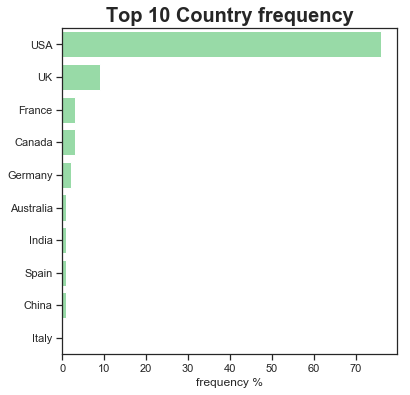

In [25]:
# country frequency

# inputs
x = data["country"].value_counts()
x = round(x / x.values.sum()*100,0)
info = {"title": "Top 10 Country frequency", "xlab": "frequency %", "ylab":"Countries"}

# plot
plt.figure(figsize=(6,6))
plt.title(info["title"], fontweight="bold", size = 20)
plt.xlabel(info["xlab"])
sns.barplot(x= x[:10].values, y= x[:10].index,  # ~mask: remove marginal features
            label="Total", color="g");

Even if most of the movies are from USA, it could be intersting to use this variable. To do so, we will create international feature that will be set to "0" for US and "1" for the rest of the world.

In [26]:
# group all the non-USA movies into "international" category
data["international"] = 0
data.loc[data["country"]!="USA","international"] = 1

## Feature engineering

In [27]:
# creation of dummy variables (we also add international to the previous selection)
for e in dummy:
    data[e] = 0
    data.loc[data["genres"].str.contains(e),e] = 1
    data.loc[data["plot_keywords"].str.contains(e, na = False),e] = 1
dummy.append("international")
data[dummy].columns.values

array(['alien', 'love', 'friend', 'death', 'new york city', 'murder',
       'police', 'high school', 'Action', 'Adventure', 'Fantasy',
       'Sci-Fi', 'Thriller', 'Documentary', 'Animation', 'Comedy',
       'Family', 'Musical', 'Romance', 'Mystery', 'Western', 'Drama',
       'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography', 'Music',
       'international'], dtype=object)

In [31]:
data[dummy].head(5)

,alien,love,friend,death,new york city,murder,police,high school,Action,Adventure,...,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,international
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


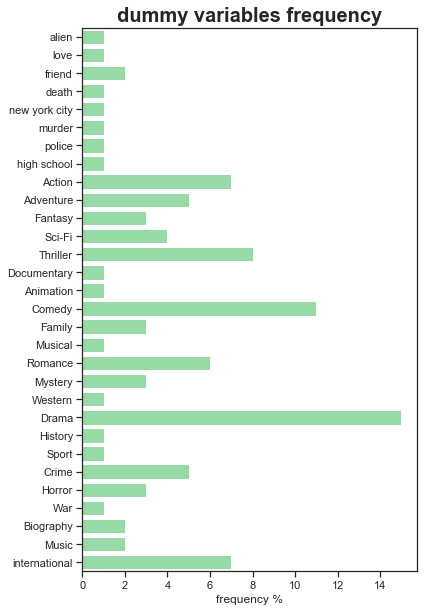

In [28]:
# dummy var frequency
x = data[dummy].sum()
x = round(x / x.values.sum()*100,0)
info = {"title": "dummy variables frequency", "xlab": "frequency %", "ylab":"Variables"}

# plot
plt.figure(figsize=(6,10))
plt.title(info["title"], fontweight="bold", size = 20)
plt.xlabel(info["xlab"])
sns.barplot(x= x.values, y= x.index,  # ~mask: remove marginal features
            label="Total", color="g");

In [29]:
print("director_size max :", data["director_size"].max())
print("director_size in :", data["director_size"].min())

KeyError: 'director_size'

In [ ]:
# "final" list of our features
data.loc[:,"international":].columns.values

In [27]:
# save data_frame
data.to_csv("imdb-5000-movie-dataset/processed_movie_metadata.csv")